# The hardest possible way to fit a gaussian

How well does a neural network work for nonlinear regression? Obviously it is way overkill, but it is interesting to check!

In [1]:
# Imports
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

Using Theano backend.


In [45]:
N = 10000
batch_size = N//50
nb_epoch = 100
nb_dense = 512
nb_hidden = 3   # The number of hidden layers to use
p_dropout = 0.5

(7500, 1) (2500, 1) (7500, 1) (2500, 1)


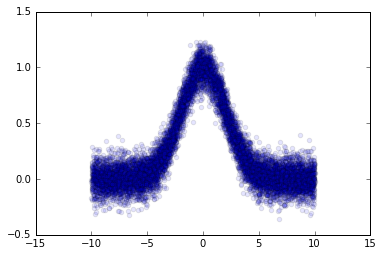

In [46]:
# Make data: y = N(0, 2)
x = np.random.uniform(-10, 10, N)
X = x[:, np.newaxis]
Y = np.exp(-X**2 / (2*2**2)) + np.random.normal(loc=0, scale=0.1, size=x.size)[:, np.newaxis]
plt.scatter(x, Y[:, 0], alpha=0.1)
#Y = y[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [47]:
print('Building model...')
model = Sequential()
model.add(Dense(nb_dense, input_shape=(X.shape[1],)))
model.add(Activation('tanh'))
model.add(Dropout(p_dropout))
for _ in range(nb_hidden-1):
    model.add(Dense(nb_dense))
    model.add(Activation('tanh'))
    model.add(Dropout(p_dropout))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

Building model...


In [48]:
import time
t1 = time.time()
result = model.fit(X, Y,
                   nb_epoch=nb_epoch, batch_size=batch_size,
                   verbose=1, validation_split=0.1)
t2 = time.time()
print('Model training took {:.2g} minutes'.format((t2-t1)/60))

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 1s - loss: 1.2129 - acc: 0.0000e+00 - val_loss: 0.1576 - val_acc: 0.0000e+00
Epoch 2/100
9000/9000 [==============================] - 1s - loss: 0.2864 - acc: 0.0000e+00 - val_loss: 0.1335 - val_acc: 0.0000e+00
Epoch 3/100
9000/9000 [==============================] - 1s - loss: 0.2593 - acc: 0.0000e+00 - val_loss: 0.1354 - val_acc: 0.0000e+00
Epoch 4/100
9000/9000 [==============================] - 1s - loss: 0.2429 - acc: 0.0000e+00 - val_loss: 0.1361 - val_acc: 0.0000e+00
Epoch 5/100
9000/9000 [==============================] - 1s - loss: 0.2168 - acc: 0.0000e+00 - val_loss: 0.1366 - val_acc: 0.0000e+00
Epoch 6/100
9000/9000 [==============================] - 1s - loss: 0.2039 - acc: 0.0000e+00 - val_loss: 0.1331 - val_acc: 0.0000e+00
Epoch 7/100
9000/9000 [==============================] - 1s - loss: 0.1879 - acc: 0.0000e+00 - val_loss: 0.1343 - val_acc: 0.0000e+00
Epoch 8/100
90

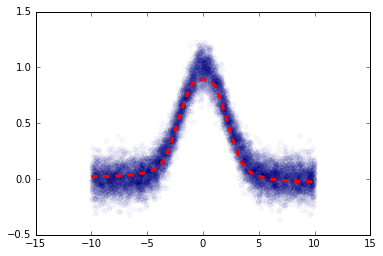

In [49]:
xplot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
Xplot = xplot[:, np.newaxis]
Yplot = model.predict(Xplot)

plt.scatter(X, Y, alpha=0.03)
plt.plot(xplot, Yplot[:, 0], 'r--', lw=3)
#plt.plot(xplot, 3*xplot - xplot**2, 'g-.', lw=2)

#plt.ylim((-0.5, 2))